In [12]:
from qutip import *
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt

In [296]:
hbar = scipy.constants.hbar
c = scipy.constants.c
delta = 1e-3*2.0*np.pi 
omega = 2.0*np.pi*778e3 #Lange
Omega = np.pi/(2.0*20e-3)
amutokg = 1.66053906660e-27
m = 170.936331517*amutokg
nuE3 = 642121496772645.1 #(Hz)
k = 2.0*np.pi*nuE3/c
eta2 = hbar*k**2/(2.0*m*omega)   #eta squared

N = 100

sm = tensor(destroy(2), qeye(N))   #internal atomic state lowering operator
sp = sm.dag()
sz = tensor(sigmaz(), qeye(N))
am = tensor(qeye(2), destroy(N))   #motional state lowering operator
ap = am.dag()
x = np.sqrt(hbar/(2.0*m*omega))*(ap + am)

def prob(n,nbar):
    return 1.0/(nbar+1)*(nbar/(nbar+1))**n

In [314]:
nbar = 10
rho0 = tensor(fock_dm(2,0), thermal_dm(N,nbar))

#The following are from Kuznetsov paper:
H = delta*(sz - sm*sp) - omega*(ap*am + 0.5)

#V = Omega*(sp*(1j*k*x).expm() + sm*(-1j*k*x).expm())

# = Omega/2.0*(sp+sm)

V = (Omega/2.0)*(1.0 - ap*am*eta2 + ap*am*(ap*am-1.0)*eta2**2/4.0)*(sp+sm)

#The collapse operators are
nbardot = 1000
c1 = np.sqrt(nbardot/nbar*(nbar+1))*am
c2 = np.sqrt(nbardot/nbar*nbar)*ap

In [328]:
ts = np.linspace(0,320e-3,100)
#rho = mesolve(H, rho0, ts, [c1, c2], [ap*am, sp*sm])
rho = mesolve(tensor(qeye(2),qeye(N)), rho0, ts, [c1, c2], [ap*am, sp*sm], options=Options(nsteps=10000))#, atol=1e-2, rtol=1e-2))

KeyboardInterrupt: 

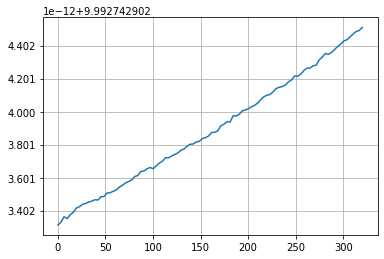

In [322]:
plt.plot(ts*1e3, rho.expect[0])
#plt.ylim(9,11)
plt.grid()

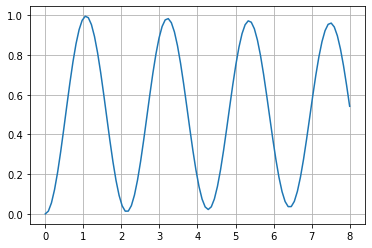

In [317]:
plt.plot(ts*Omega/(np.pi), rho.expect[1])
plt.grid()

In [275]:
expect(ap*am,tensor(fock_dm(2,0),thermal_dm(N,12)))

11.96658553846319

In [319]:
np.sqrt(eta2)

0.08296176565119641

In [326]:
rho.states

[]

In [327]:
rho1 = sesolve(H+V, rho0, ts)

TypeError: The unitary solver requires psi0 to be a ket as initial state or a unitary as initial operator.

In [330]:
destroy(2).dag()+destroy(2)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

In [332]:
destroy(3).dag()*destroy(3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]